In [ ]:
# Note: Each CSV import is modular so they can be run without having to run the entire notebook 
# if you want to examine the dataframes

In [62]:
# Do initial imports, read CSV, create dataframe and show first 5 values
import pandas as pd
df = pd.read_csv ('../Data/Argentina/Argentina Exchange Rate.csv')
df.head()

,DATE,RBARBIS
0,1994-01-01,254.28
1,1994-02-01,252.86
2,1994-03-01,250.13
3,1994-04-01,250.50
4,1994-05-01,248.76


In [63]:
# Change name of column to accurately reflect values it contains

df['Broad Effective Exchange Rate'] = df['RBARBIS']

df.drop(columns=['RBARBIS'], inplace=True)

df.head()

,DATE,Broad Effective Exchange Rate
0,1994-01-01,254.28
1,1994-02-01,252.86
2,1994-03-01,250.13
3,1994-04-01,250.50
4,1994-05-01,248.76


<AxesSubplot:>

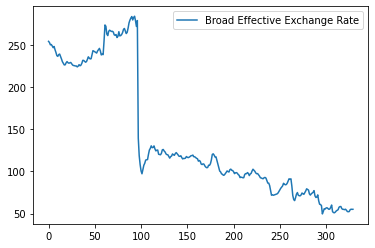

In [64]:
# Import matplotlib & plot dataframe

import matplotlib

df.plot.line()

In [65]:
# Import CSV and rename columns

import pandas as pd

df1 = pd.read_csv ('../Data/Argentina/Argentina CPI.csv')

df1['Consumer Price Index'] = df1['DDOE02PYA086NWDB']

df1.drop(columns=['DDOE02PYA086NWDB'], inplace=True)

df1.head()

,DATE,Consumer Price Index
0,1996-01-01,34.0693
1,1997-01-01,36.4372
2,1998-01-01,40.6470
3,1999-01-01,43.3912
4,2000-01-01,47.2893


In [66]:
# Import CSV, copy & rename columns

import pandas as pd

df2 = pd.read_csv ('../Data/Argentina/Argentina GDP Change.csv')

df2['GDP Percent Change'] = df2['ARGNGDPRPCH']

df2.drop(columns=['ARGNGDPRPCH'], inplace=True)

df2_copy = df2

df2_copy.head()

,DATE,GDP Percent Change
0,1980-01-01,0.700
1,1981-01-01,-5.744
2,1982-01-01,-3.149
3,1983-01-01,3.733
4,1984-01-01,2.000


<AxesSubplot:>

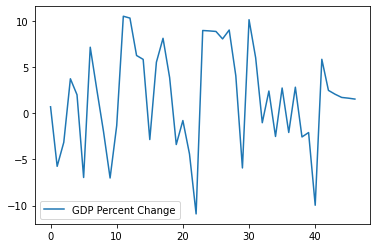

In [67]:
# Plot dataframe to check data

df2_copy.plot.line()

In [68]:
# Merge the first two dataframes 

frames = pd.merge(df,df1)

frames.head()


,DATE,Broad Effective Exchange Rate,Consumer Price Index
0,1996-01-01,229.23,34.0693
1,1997-01-01,228.25,36.4372
2,1998-01-01,243.23,40.6470
3,1999-01-01,254.71,43.3912
4,2000-01-01,261.44,47.2893


In [71]:
# Merge all dataframes into a consolidated dataframe from plotting and analysis

Argentina_df = pd.merge(frames, df2_copy)

Argentina_df.drop(columns=['DATE'], inplace=True)

Argentina_df.head()

,Broad Effective Exchange Rate,Consumer Price Index,GDP Percent Change
0,229.23,34.0693,5.527
1,228.25,36.4372,8.111
2,243.23,40.6470,3.850
3,254.71,43.3912,-3.385
4,261.44,47.2893,-0.789


<AxesSubplot:>

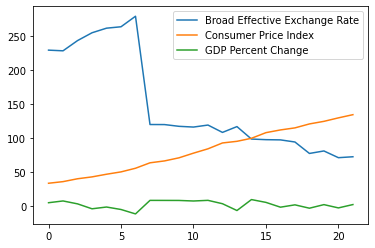

In [72]:
# Plot the consolidated dataframe to review results before regression analysis

Argentina_df.plot.line()

In [73]:
# Import mopdule for scatterplot
import matplotlib.pyplot as plt

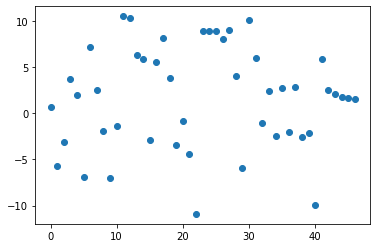

In [74]:
# Display sample data for scatter plot

plt.scatter(df2_copy.index , df2_copy['GDP Percent Change'])

In [75]:
# Import linear regression from sklearn

from sklearn.linear_model import LinearRegression

In [76]:
# Initialize linear regression as a variable

model = LinearRegression()
model

LinearRegression()

In [78]:
# Note: The dataframes were not analyzed in order. 
# Reshape values
X = df2_copy.index.values.reshape(-1,1)
y = df2_copy['GDP Percent Change'].values.reshape(-1,1)

In [79]:
# Fit the model
model.fit(X, y)

LinearRegression()

In [80]:
# Predict the 'y' values

predicted_y_values = model.predict(X)
predicted_y_values

array([[1.54446809],
       [1.55042276],
       [1.55637743],
       [1.5623321 ],
       [1.56828677],
       [1.57424144],
       [1.58019611],
       [1.58615079],
       [1.59210546],
       [1.59806013],
       [1.6040148 ],
       [1.60996947],
       [1.61592414],
       [1.62187882],
       [1.62783349],
       [1.63378816],
       [1.63974283],
       [1.6456975 ],
       [1.65165217],
       [1.65760685],
       [1.66356152],
       [1.66951619],
       [1.67547086],
       [1.68142553],
       [1.6873802 ],
       [1.69333488],
       [1.69928955],
       [1.70524422],
       [1.71119889],
       [1.71715356],
       [1.72310823],
       [1.7290629 ],
       [1.73501758],
       [1.74097225],
       [1.74692692],
       [1.75288159],
       [1.75883626],
       [1.76479093],
       [1.77074561],
       [1.77670028],
       [1.78265495],
       [1.78860962],
       [1.79456429],
       [1.80051896],
       [1.80647364],
       [1.81242831],
       [1.81838298]])

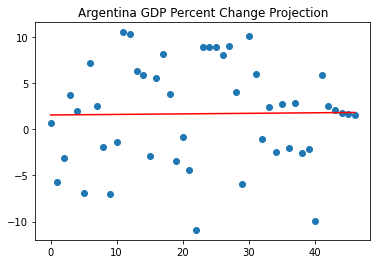

In [81]:
# Show a scatter plot incorporating the linear regression

plt.scatter(X, y)
plt.title('Argentina GDP Percent Change Projection')
plt.plot(X, predicted_y_values, color='red')

In [104]:
from sklearn.linear_model import LinearRegression

In [82]:
# Initialize a new model

model2 = LinearRegression()
model2

LinearRegression()

In [83]:
# Reshape the CPI data and values

X = Argentina_df.index.values.reshape(-1,1)
y = Argentina_df['Consumer Price Index'].values.reshape(-1,1)

In [84]:
# Fit the model

model2.fit(X, y)

LinearRegression()

In [85]:
# Predict the 'y' values
predicted_y_values = model2.predict(X)
predicted_y_values

array([[ 28.95627628],
       [ 34.02715257],
       [ 39.09802885],
       [ 44.16890514],
       [ 49.23978142],
       [ 54.31065771],
       [ 59.38153399],
       [ 64.45241028],
       [ 69.52328656],
       [ 74.59416285],
       [ 79.66503913],
       [ 84.73591542],
       [ 89.8067917 ],
       [ 94.87766798],
       [ 99.94854427],
       [105.01942055],
       [110.09029684],
       [115.16117312],
       [120.23204941],
       [125.30292569],
       [130.37380198],
       [135.44467826]])

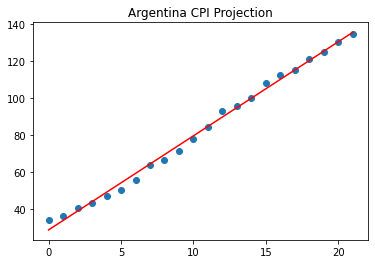

In [86]:
# Create a scatter plot showing the linear regression projection

plt.scatter(X, y)
plt.title('Argentina CPI Projection')
plt.plot(X, predicted_y_values, color='red')

In [ ]:
from sklearn.linear_model import LinearRegression

In [87]:
# Initialize a new model

model3 = LinearRegression()
model3

LinearRegression()

In [88]:
# Reshape the values for the first dataframe

X = df.index.values.reshape(-1,1)
y = df['Broad Effective Exchange Rate'].values.reshape(-1,1)

In [89]:
# Fit the data

model3.fit(X, y)

LinearRegression()

In [90]:
# Predict the 'y' values

predicted_y_values = model3.predict(X)
predicted_y_values

array([[251.74087137],
       [251.05255752],
       [250.36424366],
       [249.67592981],
       [248.98761596],
       [248.2993021 ],
       [247.61098825],
       [246.9226744 ],
       [246.23436054],
       [245.54604669],
       [244.85773283],
       [244.16941898],
       [243.48110513],
       [242.79279127],
       [242.10447742],
       [241.41616357],
       [240.72784971],
       [240.03953586],
       [239.351222  ],
       [238.66290815],
       [237.9745943 ],
       [237.28628044],
       [236.59796659],
       [235.90965274],
       [235.22133888],
       [234.53302503],
       [233.84471117],
       [233.15639732],
       [232.46808347],
       [231.77976961],
       [231.09145576],
       [230.4031419 ],
       [229.71482805],
       [229.0265142 ],
       [228.33820034],
       [227.64988649],
       [226.96157264],
       [226.27325878],
       [225.58494493],
       [224.89663107],
       [224.20831722],
       [223.52000337],
       [222.83168951],
       [222

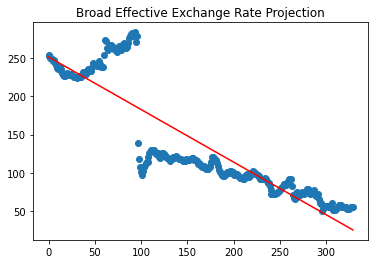

In [91]:
# Create a scatter plot of the linear regression data

plt.scatter(X, y)
plt.title('Broad Effective Exchange Rate Projection')
plt.plot(X, predicted_y_values, color='red')

In [ ]:
from sklearn.linear_model import LinearRegression

In [93]:
# Since the data for monthly exchange rate data to USD doesn't link up in terms of date, I chose to do the import down below
# the consolidated dataframe.

import pandas as pd 

df3 = pd.read_csv ('../Data/Argentina/Argentina Monthly Exchange Rate.csv')

df3['Exchange Rate (to USD)'] = df3['ARGCCUSMA02STM']

df3.drop(columns=['ARGCCUSMA02STM'], inplace=True)

df3_copy = df3

df3_copy.tail()

,DATE,Exchange Rate (to USD)
116,2021-01-01,85.8755
117,2021-02-01,88.5522
118,2021-03-01,90.9659
119,2021-04-01,92.7640
120,2021-05-01,94.0042


In [99]:
# Initialize new regression model

model4 = LinearRegression()
model4

LinearRegression()

In [100]:
X = df3_copy.index.values.reshape(-1,1)
y = df3_copy['Exchange Rate (to USD)'].values.reshape(-1,1)

In [101]:
# Fit the data to the model

model4.fit(X, y)

LinearRegression()

In [102]:
# Predict the 'y' values

predicted_y_values = model4.predict(X)
predicted_y_values

array([[-1.31575955e+01],
       [-1.25319183e+01],
       [-1.19062411e+01],
       [-1.12805639e+01],
       [-1.06548867e+01],
       [-1.00292095e+01],
       [-9.40353233e+00],
       [-8.77785514e+00],
       [-8.15217794e+00],
       [-7.52650074e+00],
       [-6.90082355e+00],
       [-6.27514635e+00],
       [-5.64946915e+00],
       [-5.02379196e+00],
       [-4.39811476e+00],
       [-3.77243756e+00],
       [-3.14676037e+00],
       [-2.52108317e+00],
       [-1.89540597e+00],
       [-1.26972877e+00],
       [-6.44051578e-01],
       [-1.83743811e-02],
       [ 6.07302816e-01],
       [ 1.23298001e+00],
       [ 1.85865721e+00],
       [ 2.48433441e+00],
       [ 3.11001160e+00],
       [ 3.73568880e+00],
       [ 4.36136600e+00],
       [ 4.98704319e+00],
       [ 5.61272039e+00],
       [ 6.23839759e+00],
       [ 6.86407478e+00],
       [ 7.48975198e+00],
       [ 8.11542918e+00],
       [ 8.74110637e+00],
       [ 9.36678357e+00],
       [ 9.99246077e+00],
       [ 1.0

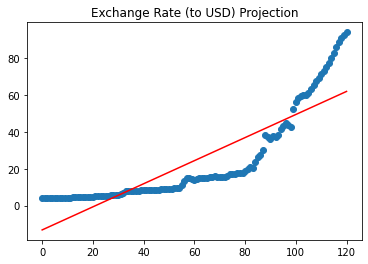

In [103]:
# Plot the results of the model 

plt.scatter(X, y)
plt.title('Exchange Rate (to USD) Projection')
plt.plot(X, predicted_y_values, color='red')

In [ ]:
# Note: the last two models are more accurate because they have more data points.